## Práctica 1 - Clustering

Los objetivos de esta práctica son los siguientes:

- Utilizar estos datos de edad y estatura para implementar :
    - Hard-clustering con k-means (no usar sklearn)
    - Soft-clustering con GMM usando sklearn
    
    
- Ejecutar al menos 5 experimentos para seleccionar el valor de “K”
    - Ambos métodos pueden usar el mismo valor de “K”
    - Analizar el centroide de cada cluster y determinar si es posible asignar una categoría  cada cluster


- Analizar y concluir si el método del codo es adecuado para este problema


- Usar los datos de prueba y estimar:
    - El cluster que k-means asigna cada uno.
    - La probabilidad de pertenecer a cada cluster según GMM
    
    
- Usar GMM y simular 1000 observaciones para estimar(estimación de Monte Carlo) el valor esperado(promedio) de la función f :

    **f(edad, estatura) = estatura /edad**
    
## Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

Se carga el dataset de estaturas y edades con pandas

In [2]:
df = pd.read_csv("estaturas_normales.csv", names=["Estatura","Edad"], header=0)
df.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


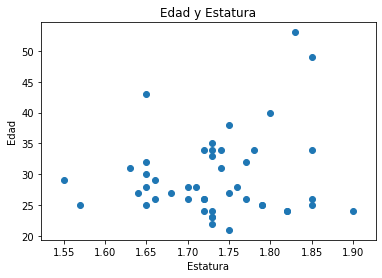

In [3]:
plt.scatter(df["Estatura"],df["Edad"])
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("Edad y Estatura")
plt.show()

### K-means

A continuación se definirá una clase para realizar clustering de la información edad y estatura por medio del algoritmo K-means.

In [4]:
class KMeans:
    def __init__(self,dataset,k,debug=False):
        self.dataset = dataset
        self.k = k
        self.centroids = self.__generate_centroids()
        self.clusters = np.zeros((dataset.shape[0],1))
        self.cost = 0
        self.debug = debug
        
    def __generate_centroids(self):
        centroids = None
        for i in range(self.dataset.shape[1]):
            column = np.random.uniform(np.min(self.dataset[:,i]), np.max(self.dataset[:,i]), self.k).reshape(-1,1)
            centroids = column if centroids is None else np.hstack((centroids,column))
        return centroids
    
    def __euclidean_distance(self, dataset, centroid):
        distance = np.sqrt(np.sum(np.subtract(dataset,centroid)**2,axis=1)).reshape(-1,1)
        return distance
            
    def __get_distances(self, dataset):
        distances = None
        for i in range(self.k):
            distance = self.__euclidean_distance(dataset,self.centroids[i])
            distances = distance if distances is None else np.hstack((distances,distance))
        return distances
    
    def __update_centroids(self):
        for i in range(self.k):
            indices = np.where(self.clusters == i)
            if (indices[0].size):
                self.centroids[i] = np.mean(self.dataset[indices],axis=0)
    
    def fit(self):
        previous_centroids = np.zeros_like(self.centroids)
        while not np.array_equal(self.centroids,previous_centroids):
            distances = self.__get_distances(self.dataset)
            self.clusters = np.argmin(distances,axis=1)
            self.cost = np.mean(np.min(distances,axis=1))
            previous_centroids = self.centroids.copy()
            if self.debug:
                print("Costo: "+str(self.cost))
                print("Actualizando centroides:")
                print(self.centroids)
                print()
            self.__update_centroids()
            
    def predict(self, dataset):
        distances = self.__get_distances(dataset)
        clusters = np.argmin(distances,axis=1)
        return clusters

In [5]:
dataset_train = df[["Estatura","Edad"]].to_numpy(dtype="float64")

kmeans = KMeans(dataset_train,3,True)
kmeans.fit()
clusters = kmeans.predict(dataset_train)
clusters

Costo: 2.348385525849347
Actualizando centroides:
[[ 1.86392929 25.34042677]
 [ 1.79842123 33.54649087]
 [ 1.84579404 26.48562007]]

Costo: 2.2992731133502793
Actualizando centroides:
[[ 1.75571429 23.85714286]
 [ 1.746875   36.6875    ]
 [ 1.698125   27.3125    ]]

Costo: 2.3262754056425248
Actualizando centroides:
[[ 1.75571429 23.85714286]
 [ 1.76384615 37.92307692]
 [ 1.69421053 27.94736842]]

Costo: 2.369208544234791
Actualizando centroides:
[[ 1.75571429 23.85714286]
 [ 1.76333333 38.41666667]
 [ 1.698      28.15      ]]

Costo: 2.3185664895274183
Actualizando centroides:
[[ 1.75       24.5       ]
 [ 1.76636364 38.90909091]
 [ 1.68466667 29.33333333]]

Costo: 2.103139549360698
Actualizando centroides:
[[ 1.75       24.5       ]
 [ 1.76833333 43.        ]
 [ 1.7045     30.5       ]]

Costo: 2.0443621857160497
Actualizando centroides:
[[ 1.74217391 24.82608696]
 [ 1.776      44.6       ]
 [ 1.70833333 31.33333333]]

Costo: 1.9384375217456853
Actualizando centroides:
[[ 1.73666667 

array([0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       0, 0])

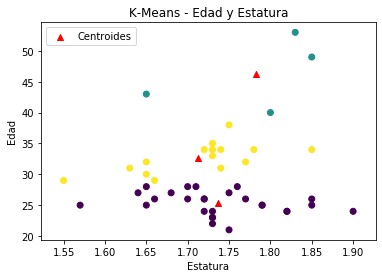

In [6]:
plt.scatter(df["Estatura"],df["Edad"],c=clusters)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='^', c='red', label="Centroides")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("K-Means - Edad y Estatura")
plt.legend()
plt.show()

### Gaussian Mixture Model
Para realizar clustering con Gaussian Mixture Model utilizaremos la clase ya definida en la librería de sklearn.

In [7]:
gmm = GaussianMixture(n_components=3)
gmm.fit(dataset_train)
gmm.predict(dataset_train)
clusters = gmm.predict(dataset_train)

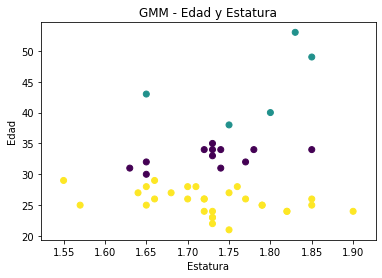

In [8]:
plt.scatter(df["Estatura"],df["Edad"],c=clusters)
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("GMM - Edad y Estatura")
plt.show()

### Encontrando K
Para encontrar el valor de K a utilizar, se correran 5 experimentos y validaremos con el método del codo cuál es el mejor K.

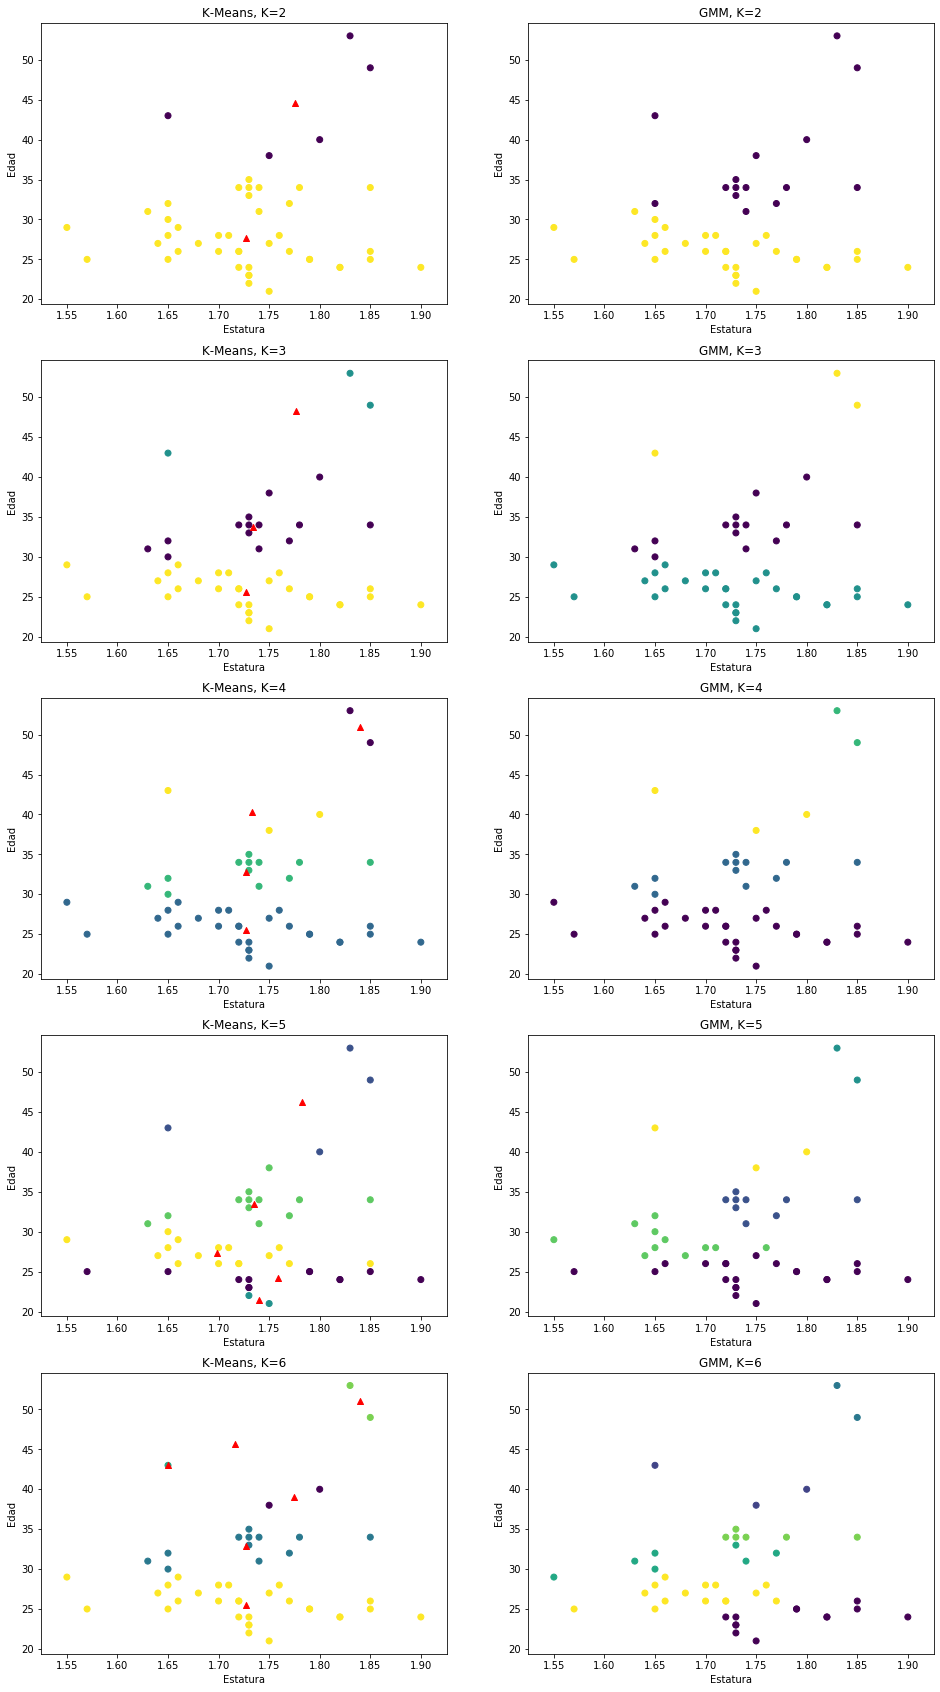

In [23]:
kmeans_costs = list()
f,axes = plt.subplots(5,2,sharex=False, figsize=(16,30))
plot_number = 0
for k in range(2,7):
    kmeans = KMeans(dataset_train,k,False)
    kmeans.fit()
    clusters = kmeans.predict(dataset_train)
    kmeans_costs.append(kmeans.cost)
    
    plot_number += 1
    plt.subplot(5,2, plot_number)
    plt.scatter(df["Estatura"],df["Edad"],c=clusters)
    plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='^', c='red', label="Centroides")
    plt.xlabel("Estatura")
    plt.ylabel("Edad")
    plt.title("K-Means, K="+str(k))
    
    gmm = GaussianMixture(n_components=k)
    gmm.fit(dataset_train)
    clusters = gmm.predict(dataset_train)
    
    plot_number += 1
    plt.subplot(5,2, plot_number)
    plt.scatter(df["Estatura"],df["Edad"],c=clusters)
    plt.xlabel("Estatura")
    plt.ylabel("Edad")
    plt.title("GMM, K="+str(k))
    
plt.show()

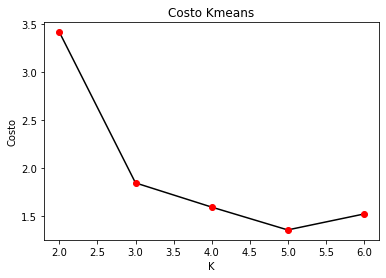

In [24]:
plt.plot(range(2,7), kmeans_costs, 'k' , range(2,7), kmeans_costs,'ro' )
plt.xlabel("K")
plt.ylabel("Costo")
plt.title("Costo Kmeans")
plt.show()

Observando la gráfica de costo obtenida durante los experimentos, podemos definir que el mejor valor de K es 3. 

Analizando las gráficas de clustering durante los experimentos, se puede observar que con un K mayor a 3, algunos centroides quedan sin categoría por lo cual podemos confirmar que el método del codo sí es efectivo para este problema.

### Agrupando datos de prueba
Ahora que ya tenemos el valor de K, se procederá a ralizar una validación con datos no vistos previamente.

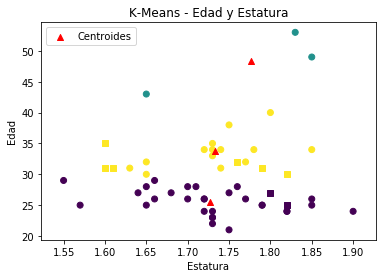

In [26]:
df_test = pd.read_csv("estaturas_valtest.csv", names=["Estatura","Edad"], header=0)
dataset_test = df_test[["Estatura","Edad"]].to_numpy(dtype="float64")

kmeans = KMeans(dataset_train,3,False)
kmeans.fit()
clusters_train = kmeans.predict(dataset_train)
clusters_test = kmeans.predict(dataset_test)

plt.scatter(df["Estatura"],df["Edad"],c=clusters_train)
plt.scatter(df_test["Estatura"],df_test["Edad"],c=clusters_test, marker="s")
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='^', c='red', label="Centroides")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("K-Means - Edad y Estatura")
plt.legend()
plt.show()


In [27]:
gmm = GaussianMixture(n_components=3)
gmm.fit(dataset_train)
gmm_clusters_train = gmm.predict(dataset_train)
gmm_clusters_test = gmm.predict(dataset_test)
gmm_probabilities = gmm.predict_proba(dataset_test)

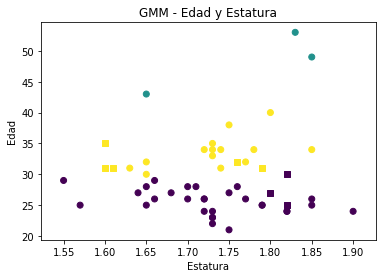

In [28]:
plt.scatter(df["Estatura"],df["Edad"],c=gmm_clusters_train)
plt.scatter(df_test["Estatura"],df_test["Edad"],c=gmm_clusters_test, marker="s")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("GMM - Edad y Estatura")
plt.show()

In [29]:
cluster_probs = list()
for i in range(len(clusters_test)):
    cluster_probs.append(gmm_probabilities[0][clusters_test[i]])
    
df_test["K-Means cluster"] = clusters_test
df_test["Probabilidad GMM"] = cluster_probs
df_test

,Estatura,Edad,K-Means cluster,Probabilidad GMM
0,1.82,25,0,0.999992
1,1.80,27,0,0.999992
2,1.60,31,2,0.000008
3,1.60,35,2,0.000008
4,1.82,30,2,0.000008
5,1.76,32,2,0.000008
6,1.79,31,2,0.000008
7,1.61,31,2,0.000008


## Generando Observaciones con GMM y Estimación de Monte Carlo

Utilizaremos el modelo previamente entrenado con GMM para simular 1000 observaciones que sigan la misma distribución de probabilidad.

In [30]:
generated_data = gmm.sample(1000)[0]
generated_data.shape

(1000, 2)

Confirmamos que tenemos 1000 observaciones de 2 dimensiones, representando la estatura y la edad. Procedemos a confirmar que los valores generados se encuentren sobre los valores esperados:

In [31]:
print(generated_data[1:20])

[[ 1.72458008 21.71752058]
 [ 1.79642827 24.95416333]
 [ 1.73330685 24.52380101]
 [ 1.79193382 25.32417856]
 [ 1.68950061 28.63578286]
 [ 1.71023826 25.84781518]
 [ 1.70347033 25.25969113]
 [ 1.88155021 20.87803212]
 [ 1.70920477 26.1385017 ]
 [ 1.70792074 25.97562624]
 [ 1.74406206 23.35822168]
 [ 1.6074065  24.33924067]
 [ 1.61533145 24.28595555]
 [ 1.73982861 25.63637231]
 [ 1.66055307 24.20834562]
 [ 1.86338371 23.34894821]
 [ 1.6949561  24.15035077]
 [ 1.72718475 28.25169464]
 [ 1.77460894 23.41641181]]


Obtenemos un array con las probabilidades del cluster al que pertenece la observación.

In [32]:
cluster_generated_data = gmm.predict(generated_data)
generated_data_probabilities = gmm.predict_proba(generated_data)
probabilities_list = list()

for i in range(len(cluster_generated_data)):
    probabilities_list.append(generated_data_probabilities[0][cluster_generated_data[i]])

probabilities = np.array(probabilities_list)

Calculamos el promedio del valor esperado de la función **f(Estaura,Edad)= Estatura/Edad**

In [33]:
mean = np.mean((generated_data[:,0]/generated_data[:,1])*probabilities)
print("Valor Esperado promedio de la funcion f(Estatura,Edad): "+str(mean))

Valor Esperado promedio de la funcion f(Estatura,Edad): 0.042400938919716205


## Conclusiones

- Los algoritmos de clustering, como K-Means o GMM, son útiles para asignar una categoría a los datos durante el aprendizaje no supervisado y posterior al entrenamiento, poder clasificar nuevos  datos no vistos durante el entrenamiento.


- Durante esta práctica se pudo validar que si se utiliza un K muy grande durante el entrenamiento de K-means, algunas categorías pueden quedar sin datos por lo que podemos basarnos en el método del codo para tener una idea de cuál es el K adecuado para el problema.

- GMM nos puede servir para simular nuevas observaciones aleatorias que se encuentren dentro de una distribución de probabilidad previamente entrenada.